In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('/content/boston.csv')

Input features in order:

1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per $10,000 [$/10k]

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population

Output variable:

1) MEDV: Median value of owner-occupied homes in $1000's [k$]

**Predict MEDV**

In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [7]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

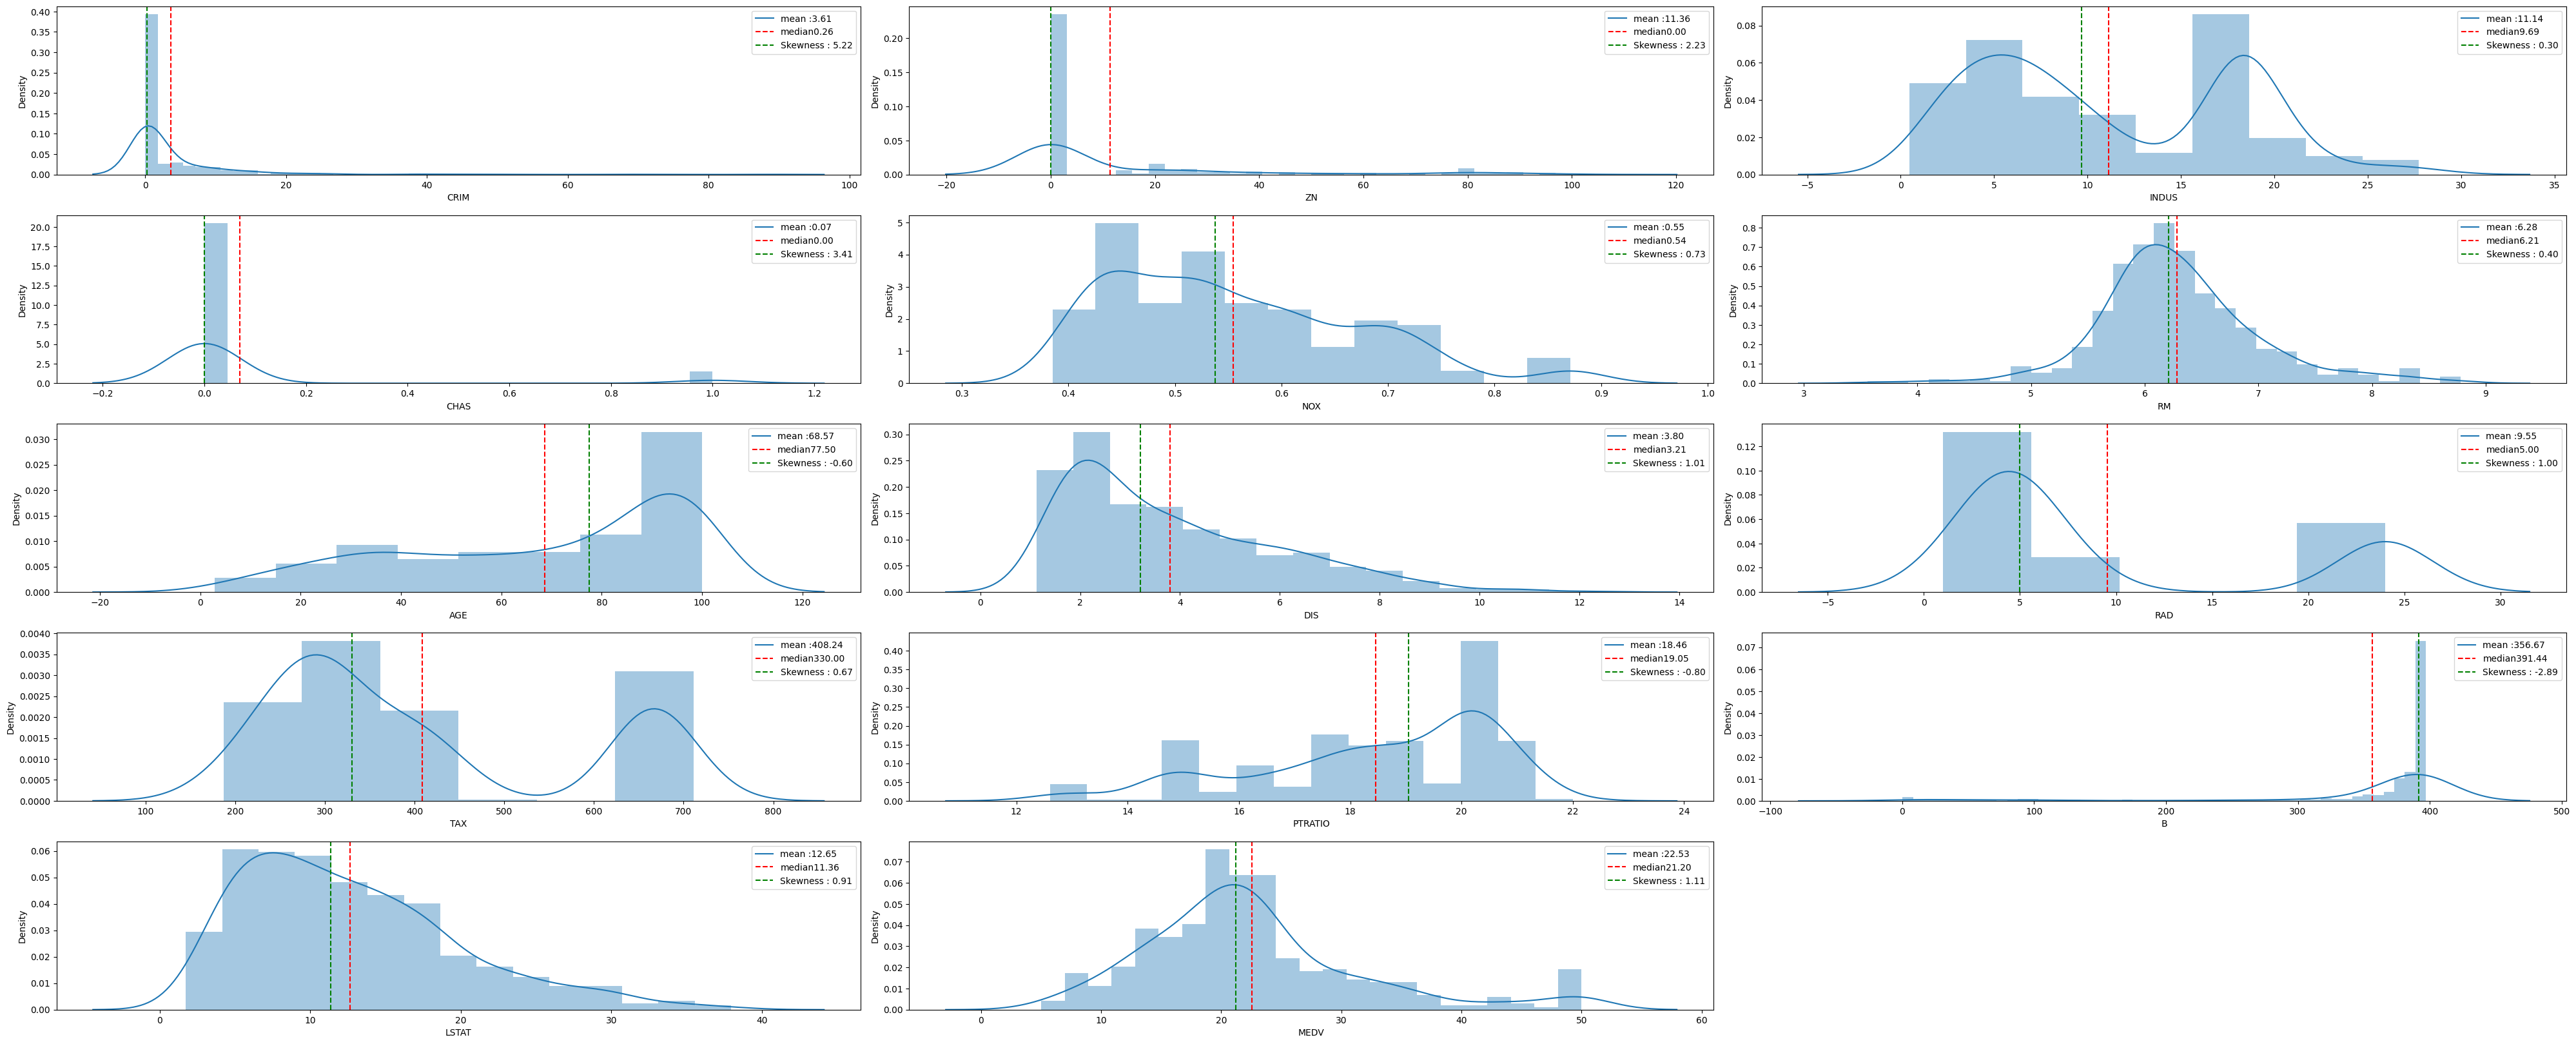

In [8]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(40,45))

for col in df.columns:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.distplot(x=df[col])
  plt.axvline(x=np.mean(df[col]),c='r',ls='--')
  plt.axvline(x=np.median(df[col]),c='g',ls='--')
  plt.legend(('mean :%.2f'%(np.mean(df[col])),'median%.2f'%(np.median(df[col])),'Skewness : %.2f'%(df[col].skew())))
  c=c+1

plt.tight_layout()
plt.show()

In [9]:
for col in df.columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr=q3-q1
  lower_tail = q1 - 1.5 * iqr
  upper_tail = q3 + 1.5 * iqr
  data = df[(df[col] < upper_tail) & (df[col] > lower_tail)]

print(df.shape)
print('*'*10)
print(data.shape)

(506, 14)
**********
(466, 14)


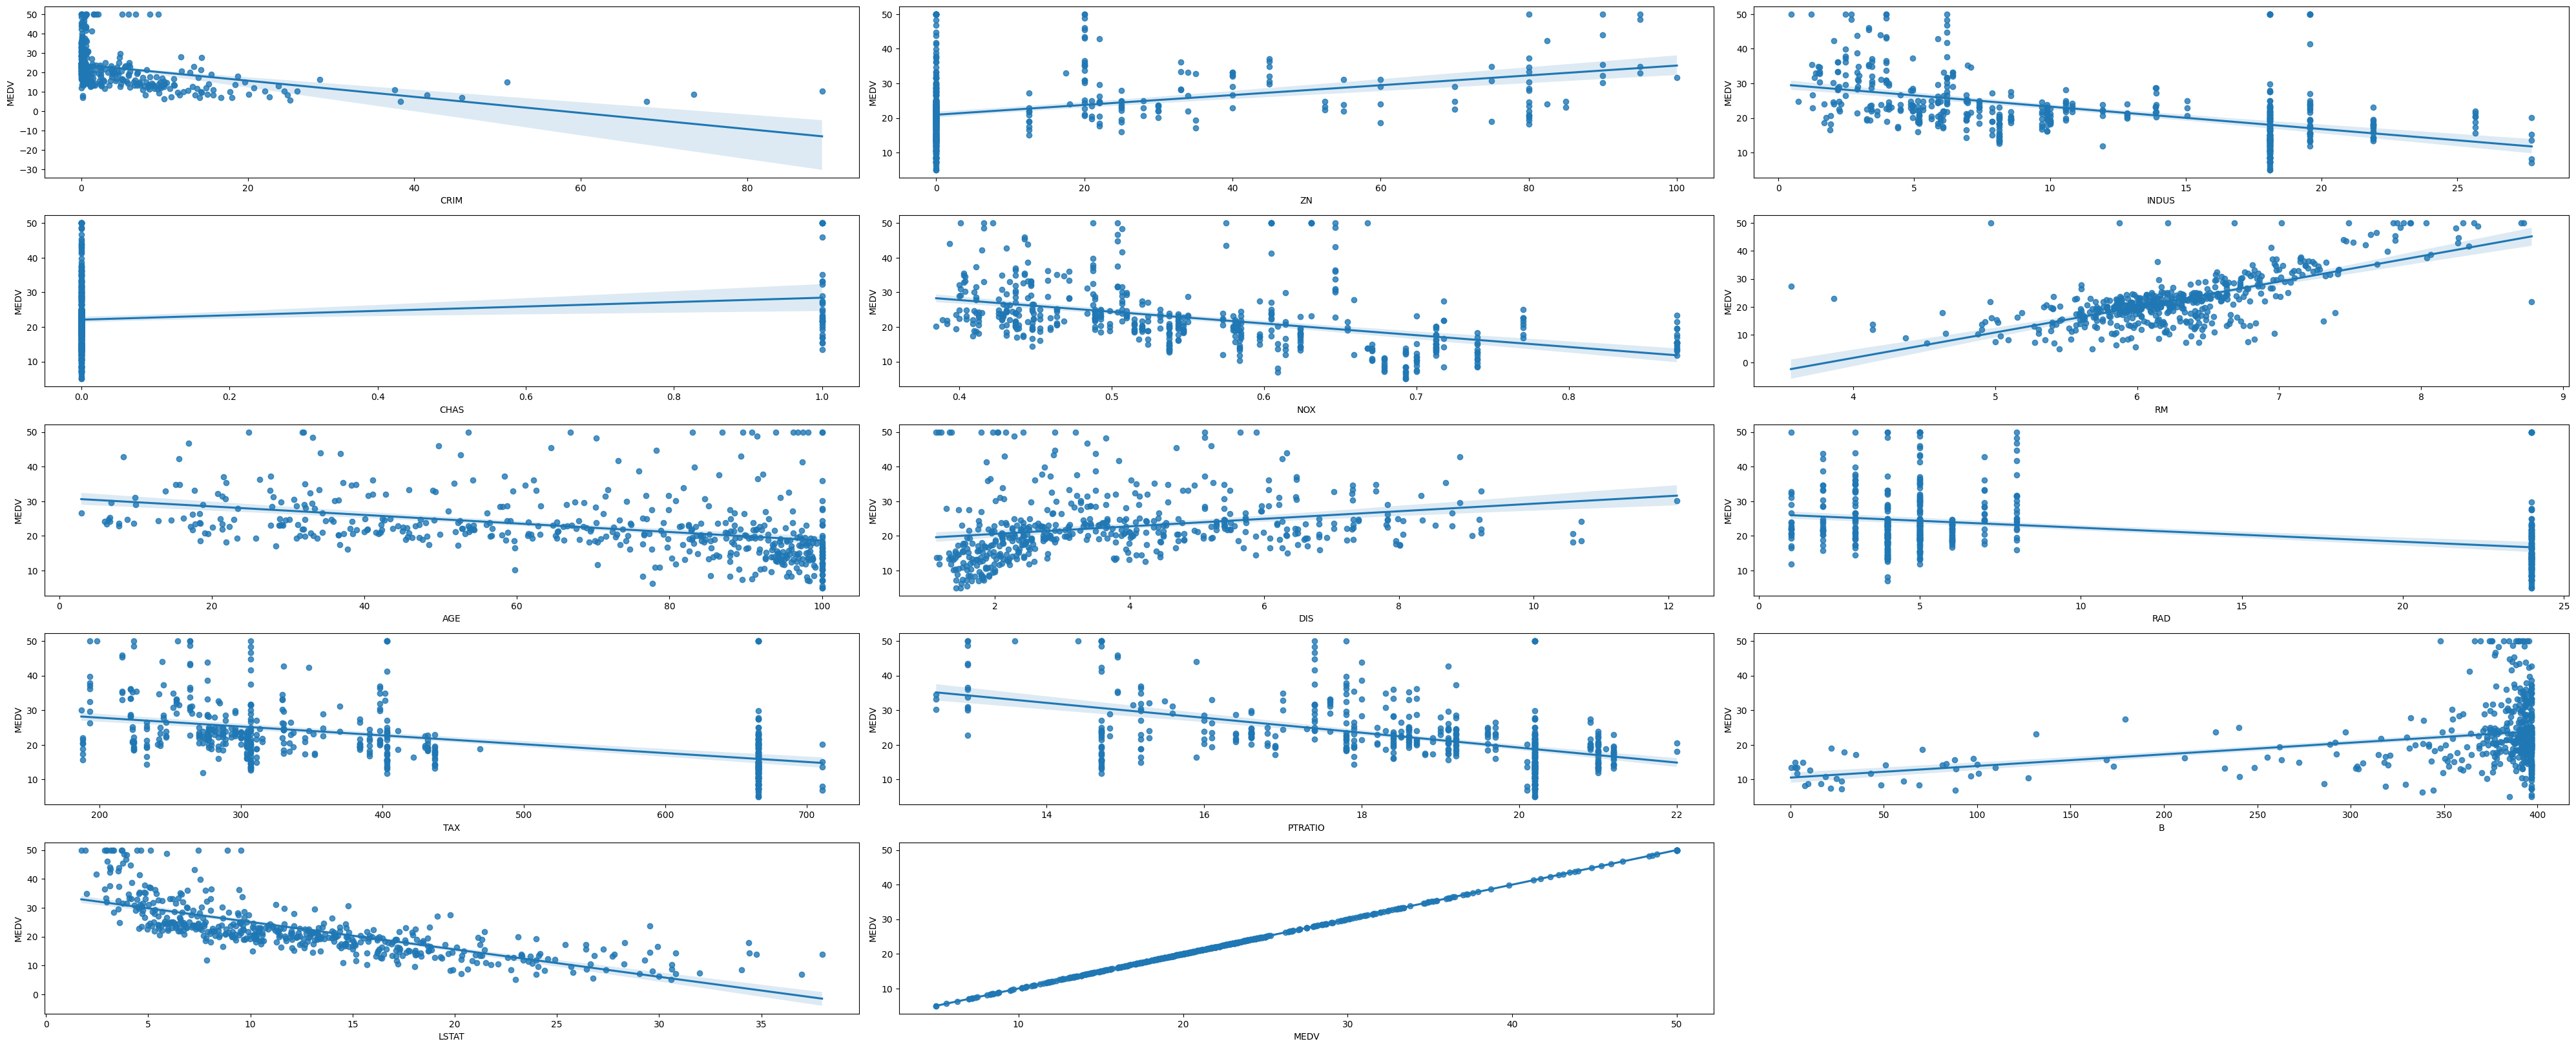

In [10]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(40,45))

for col in df.columns:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.regplot(x=df[col],y=df['MEDV'])
  c=c+1

plt.tight_layout()
plt.show()

In [11]:
# positive corr between MEDV and ZN, CHAS, RM, DIS, B
# negative corr between MEDV and INDUS, NOX, AGE, RAD, TAX, PTRATIO, LSTAT

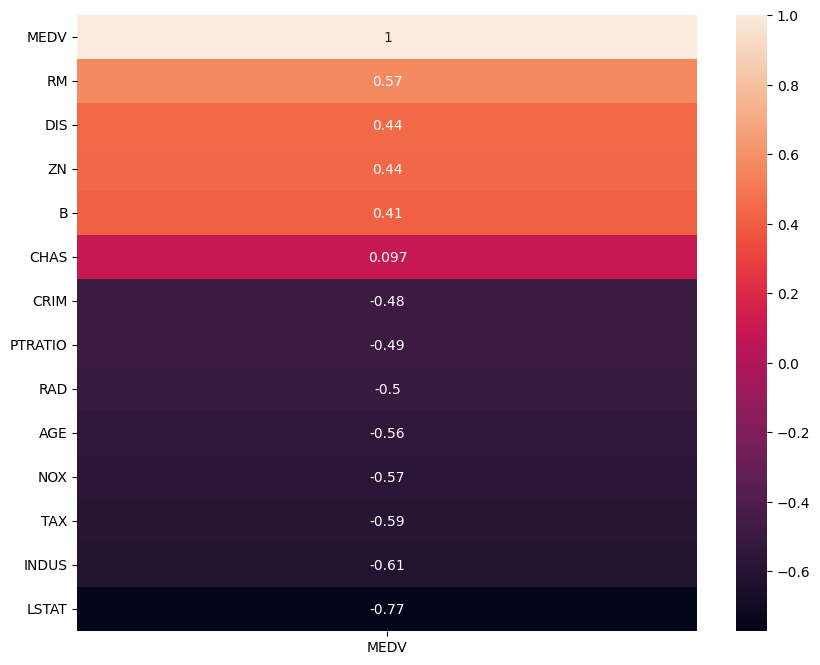

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr()[['MEDV']].sort_values(by='MEDV',ascending=False),annot=True)
plt.show()

In [13]:
#highsest positive MEDV corr : RM - DIS - ZN - B, when these variables increase MEDV also increases
#highsest negative MEDV corr : LSTAT - INDUS - TAX - NOX - AGE - RAD - PTRATIO - CRIM , when these variables increase MEDV decreases

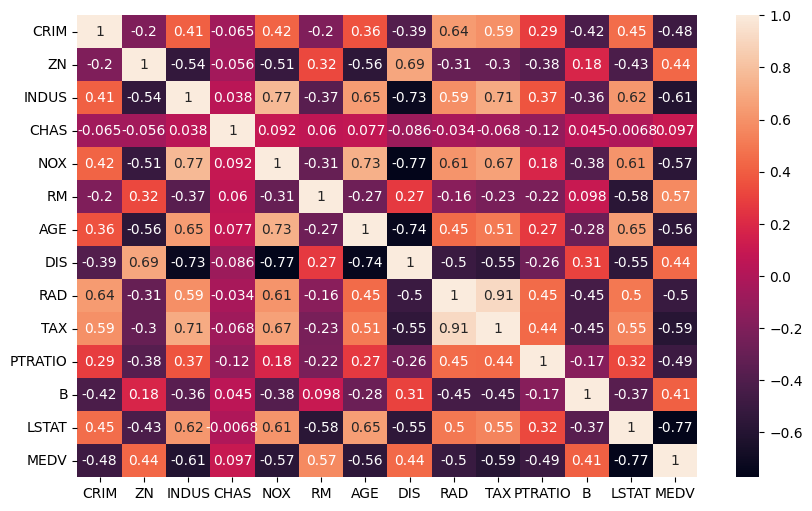

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [15]:
#highest positive RM corr : MEDV - DIS - ZN
#highest negative RM corr : LSTAT - INDUS

#highest positive DIS corr : ZN - MEDV - B - RM
#highest negative DIS corr : NOX - AGE - INDUS - TAX - LSTAT - RAD

#highest positive CRIM corr : RAD - TAX - LSTAT - NOX - AGE - INDUS
#highest negative CRIM corr : MEDV - B

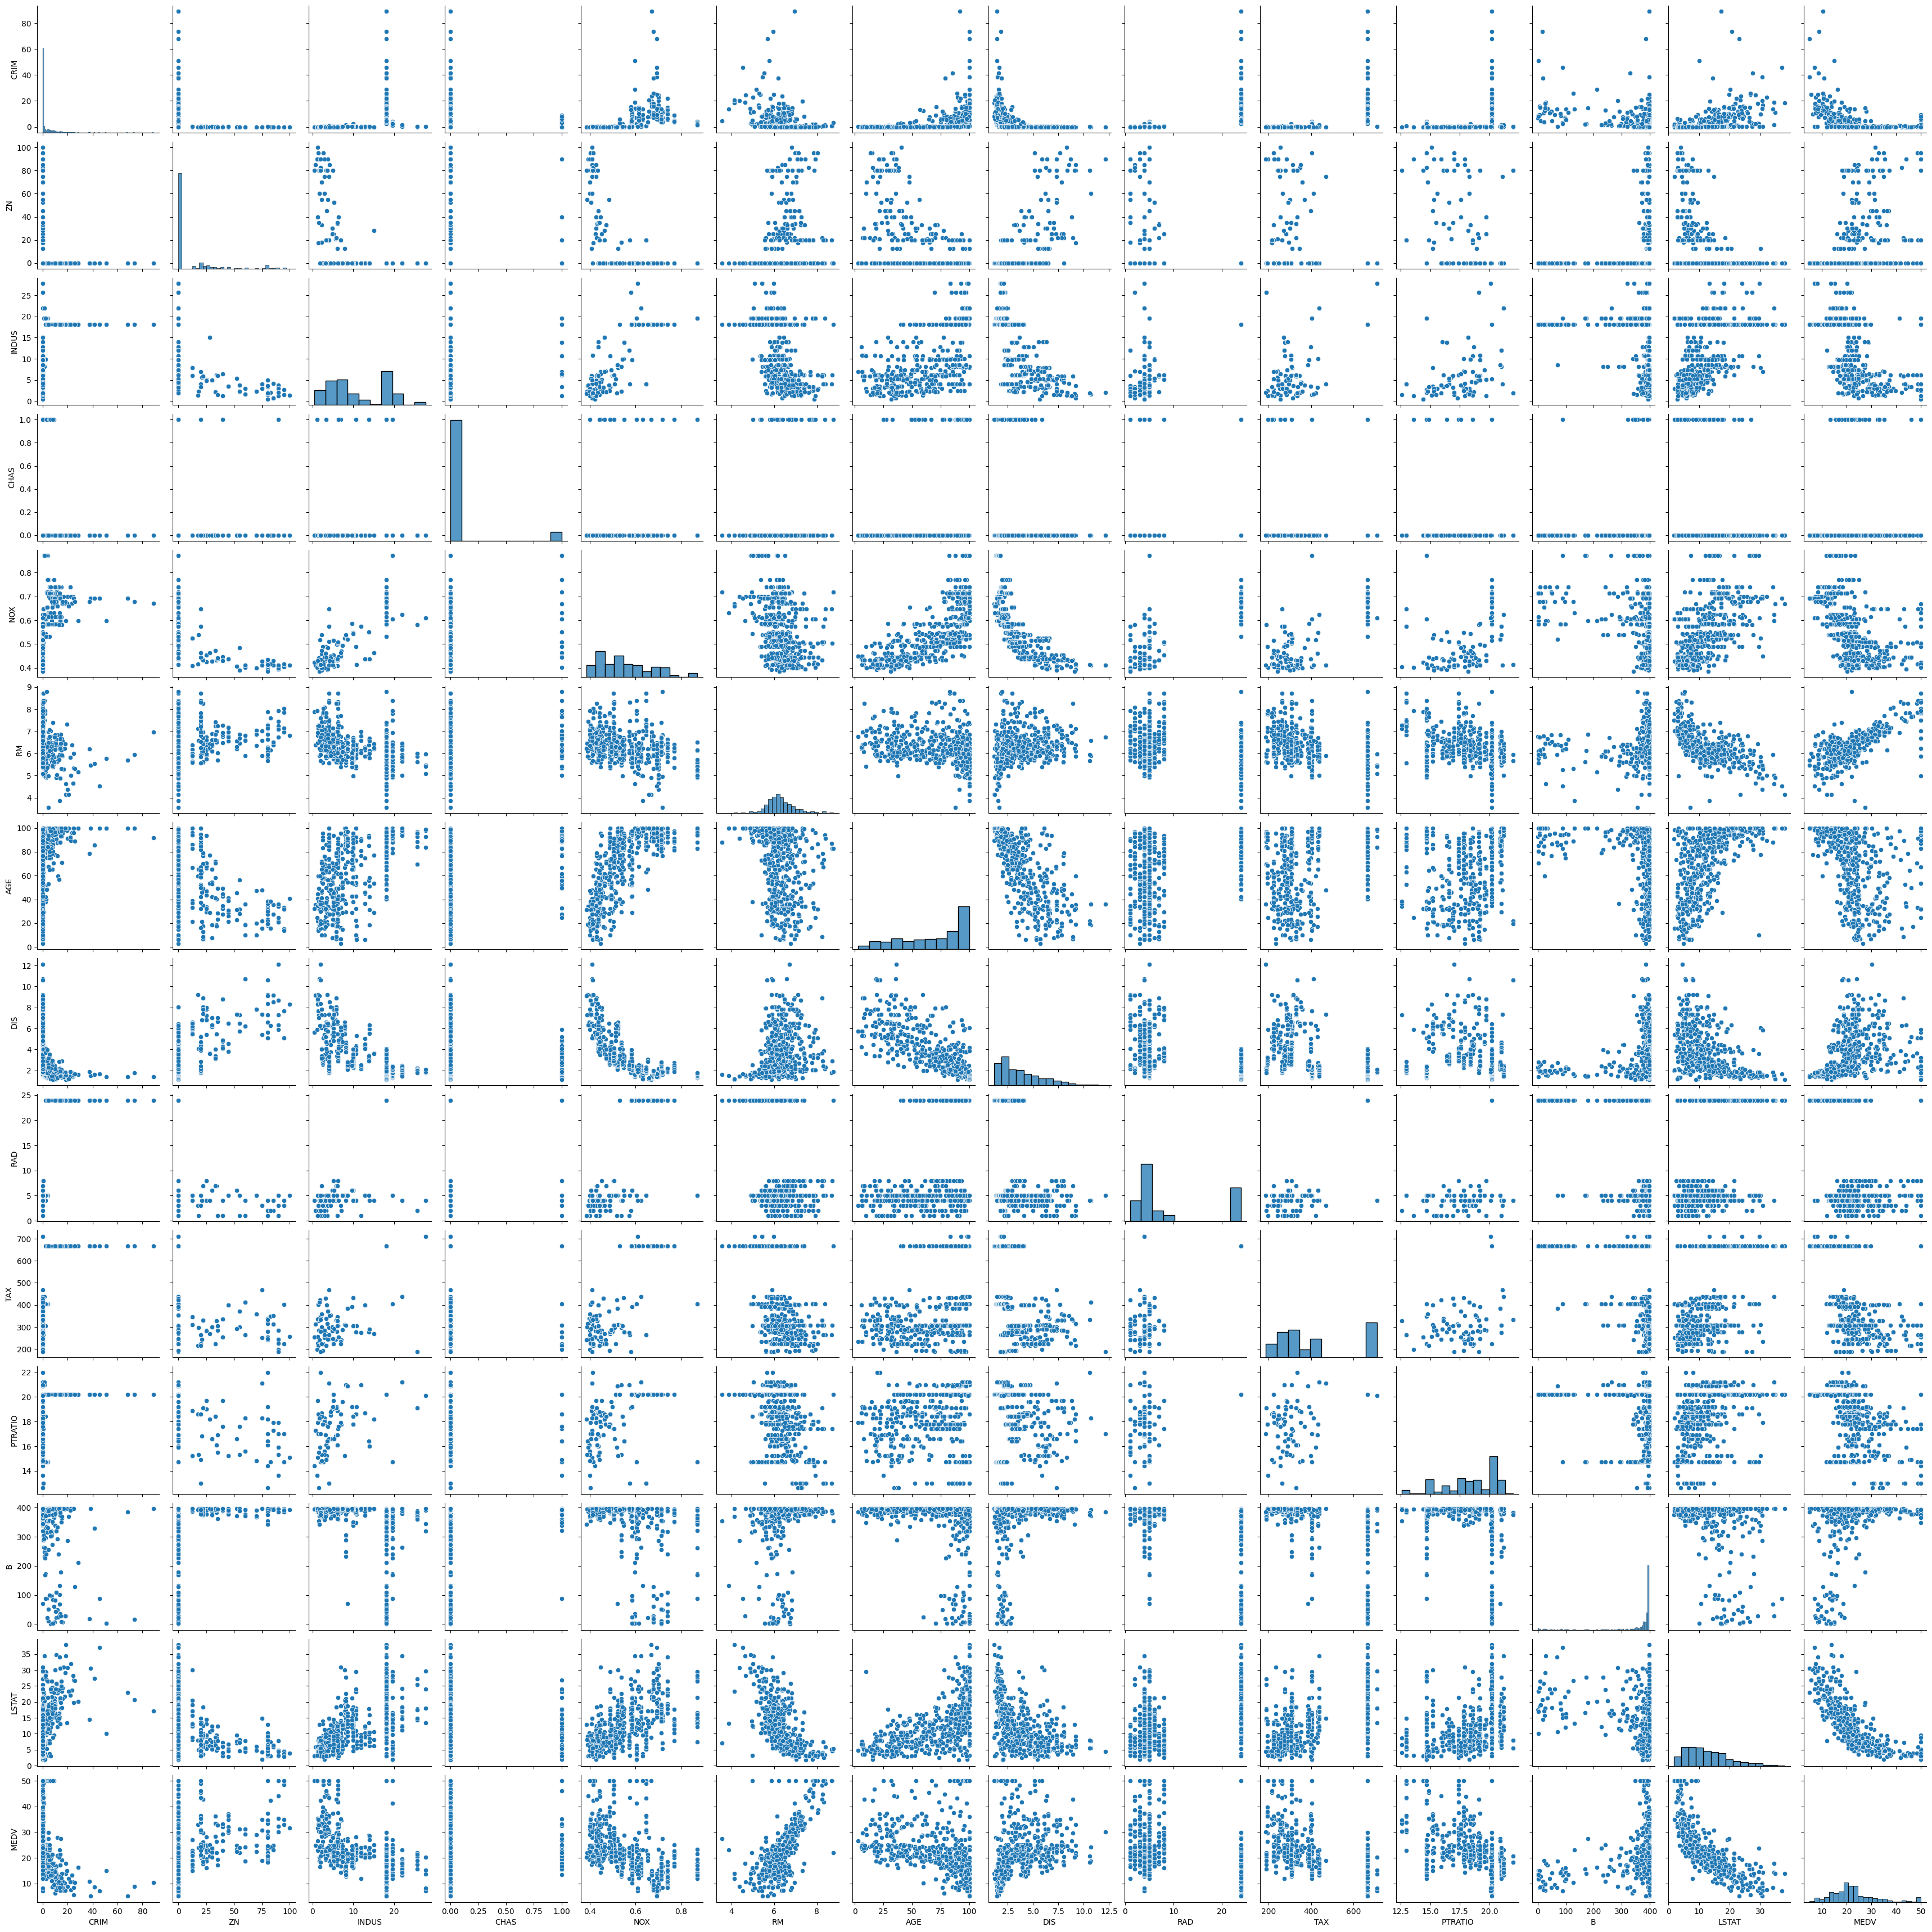

In [16]:
sns.pairplot(df)

In [17]:
#df['RM'] = df['RM'].round()

In [18]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [19]:
#df.groupby('RM')['MEDV'].mean().sort_values(ascending=False)

In [20]:
#plt.figure(figsize=(12,8))
#sns.boxplot(x='RM',y='MEDV',data=df,order=df.groupby('RM')['MEDV'].mean().sort_values(ascending=False).index.sort_values(ascending=True))
#plt.show()

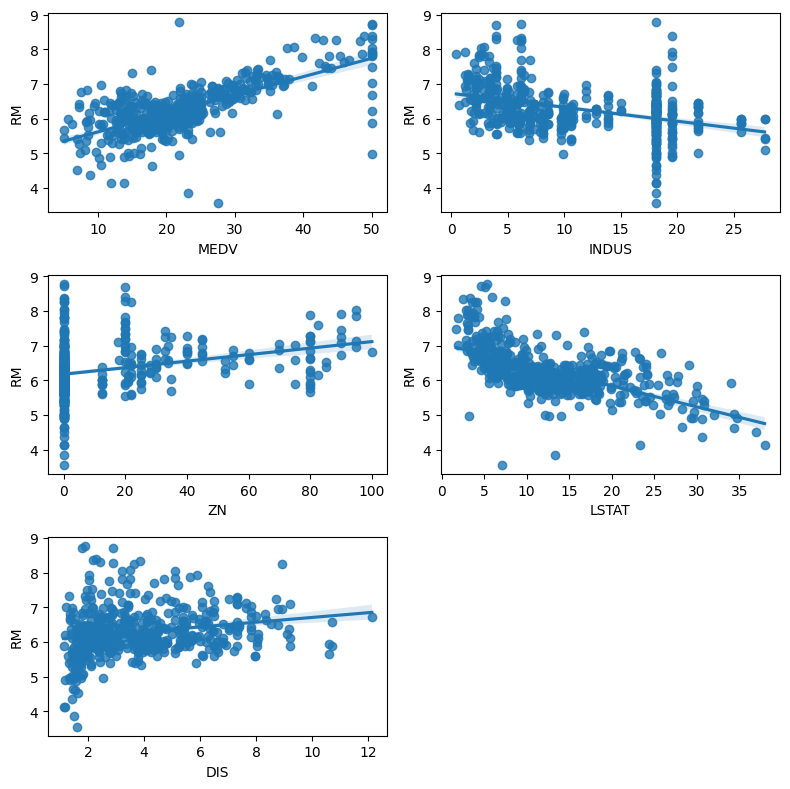

In [21]:
fig = plt.figure(figsize = (8,8))

#  subplot #1
plt.subplot(321)
sns.regplot(x='MEDV',y='RM',data=df)

#  subplot #2
plt.subplot(325)
sns.regplot(x='DIS',y='RM',data=df)

#  subplot #3
plt.subplot(323)
sns.regplot(x='ZN',y='RM',data=df)

#  subplot #4
plt.subplot(324)
sns.regplot(x='LSTAT',y='RM',data=df)

#  subplot #5
plt.subplot(322)
sns.regplot(x='INDUS',y='RM',data=df)

plt.tight_layout()
plt.show()

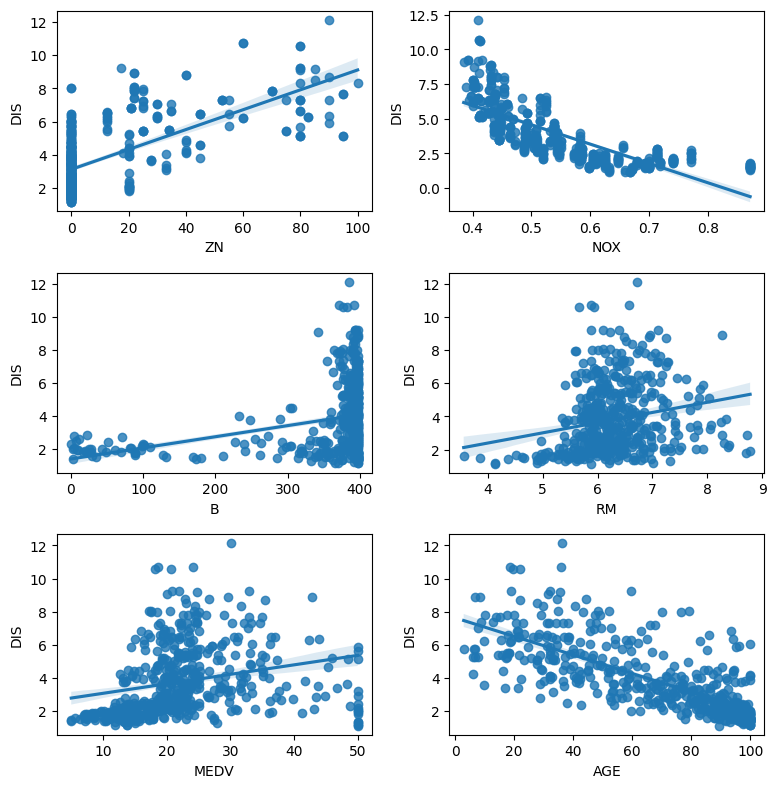

In [22]:
#highest positive DIS corr : ZN - MEDV - B - RM
#highest negative DIS corr : NOX - AGE - INDUS - TAX - LSTAT - RAD


fig = plt.figure(figsize = (8,8))

#  subplot #1
plt.subplot(321)
sns.regplot(x='ZN',y='DIS',data=df)

#  subplot #2
plt.subplot(325)
sns.regplot(x='MEDV',y='DIS',data=df)

#  subplot #3
plt.subplot(323)
sns.regplot(x='B',y='DIS',data=df)

#  subplot #4
plt.subplot(324)
sns.regplot(x='RM',y='DIS',data=df)

#  subplot #5
plt.subplot(322)
sns.regplot(x='NOX',y='DIS',data=df)

#  subplot #5
plt.subplot(326)
sns.regplot(x='AGE',y='DIS',data=df)

plt.tight_layout()
plt.show()

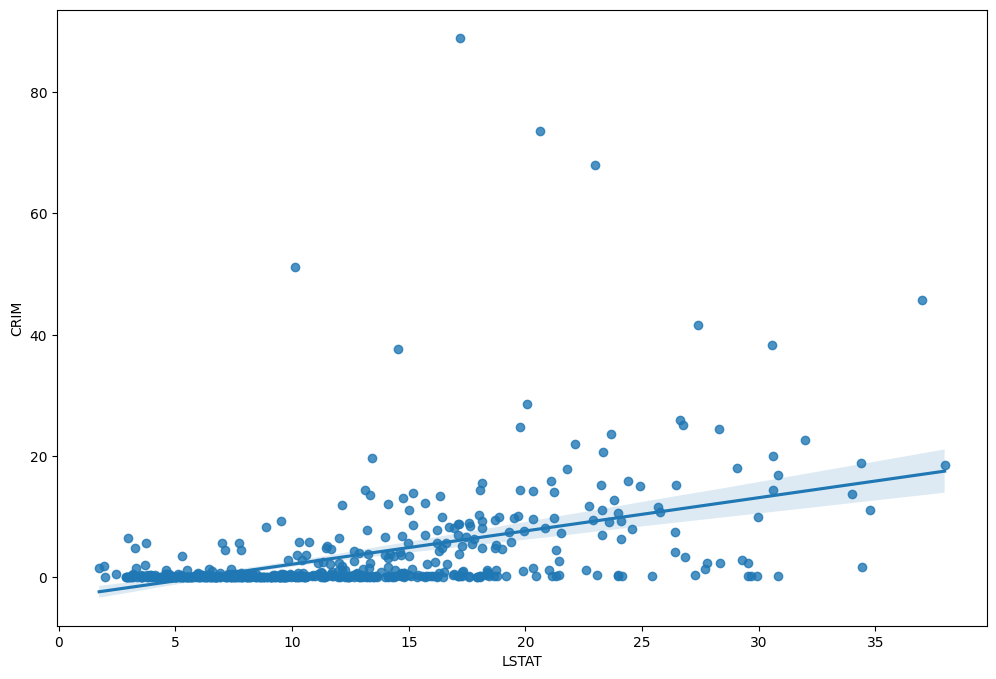

In [23]:
plt.figure(figsize=(12,8))
sns.regplot(x='LSTAT',y='CRIM',data=df)
plt.show( )

In [24]:
df[['DIS','RAD']].describe()

DIS         RAD
count  506.000000  506.000000
mean     3.795043    9.549407
std      2.105710    8.707259
min      1.129600    1.000000
25%      2.100175    4.000000
50%      3.207450    5.000000
75%      5.188425   24.000000
max     12.126500   24.000000

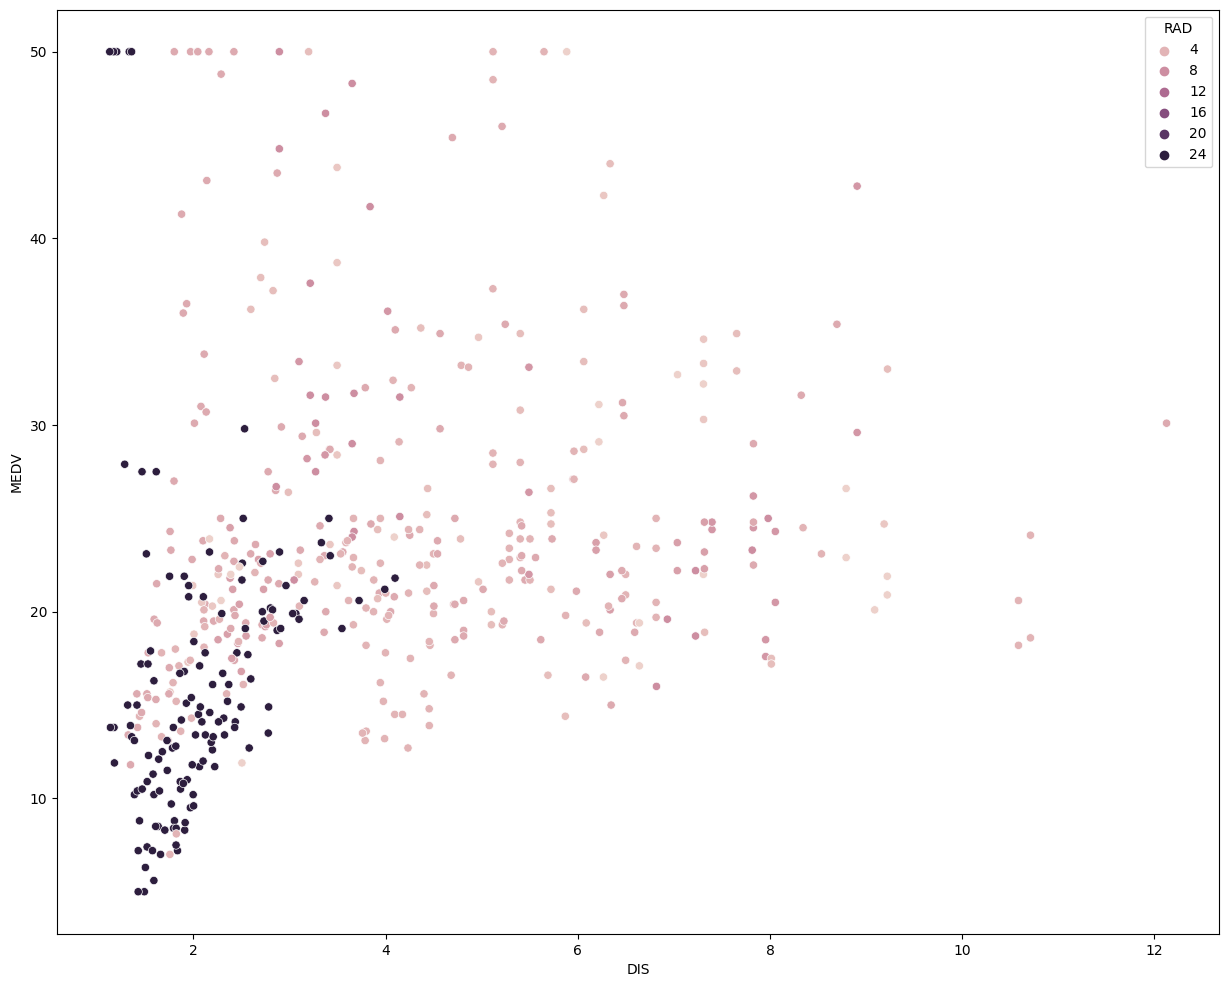

In [25]:
plt.figure(figsize=(15,12))
sns.scatterplot(hue='RAD',y='MEDV',x='DIS',data=df)
plt.show()

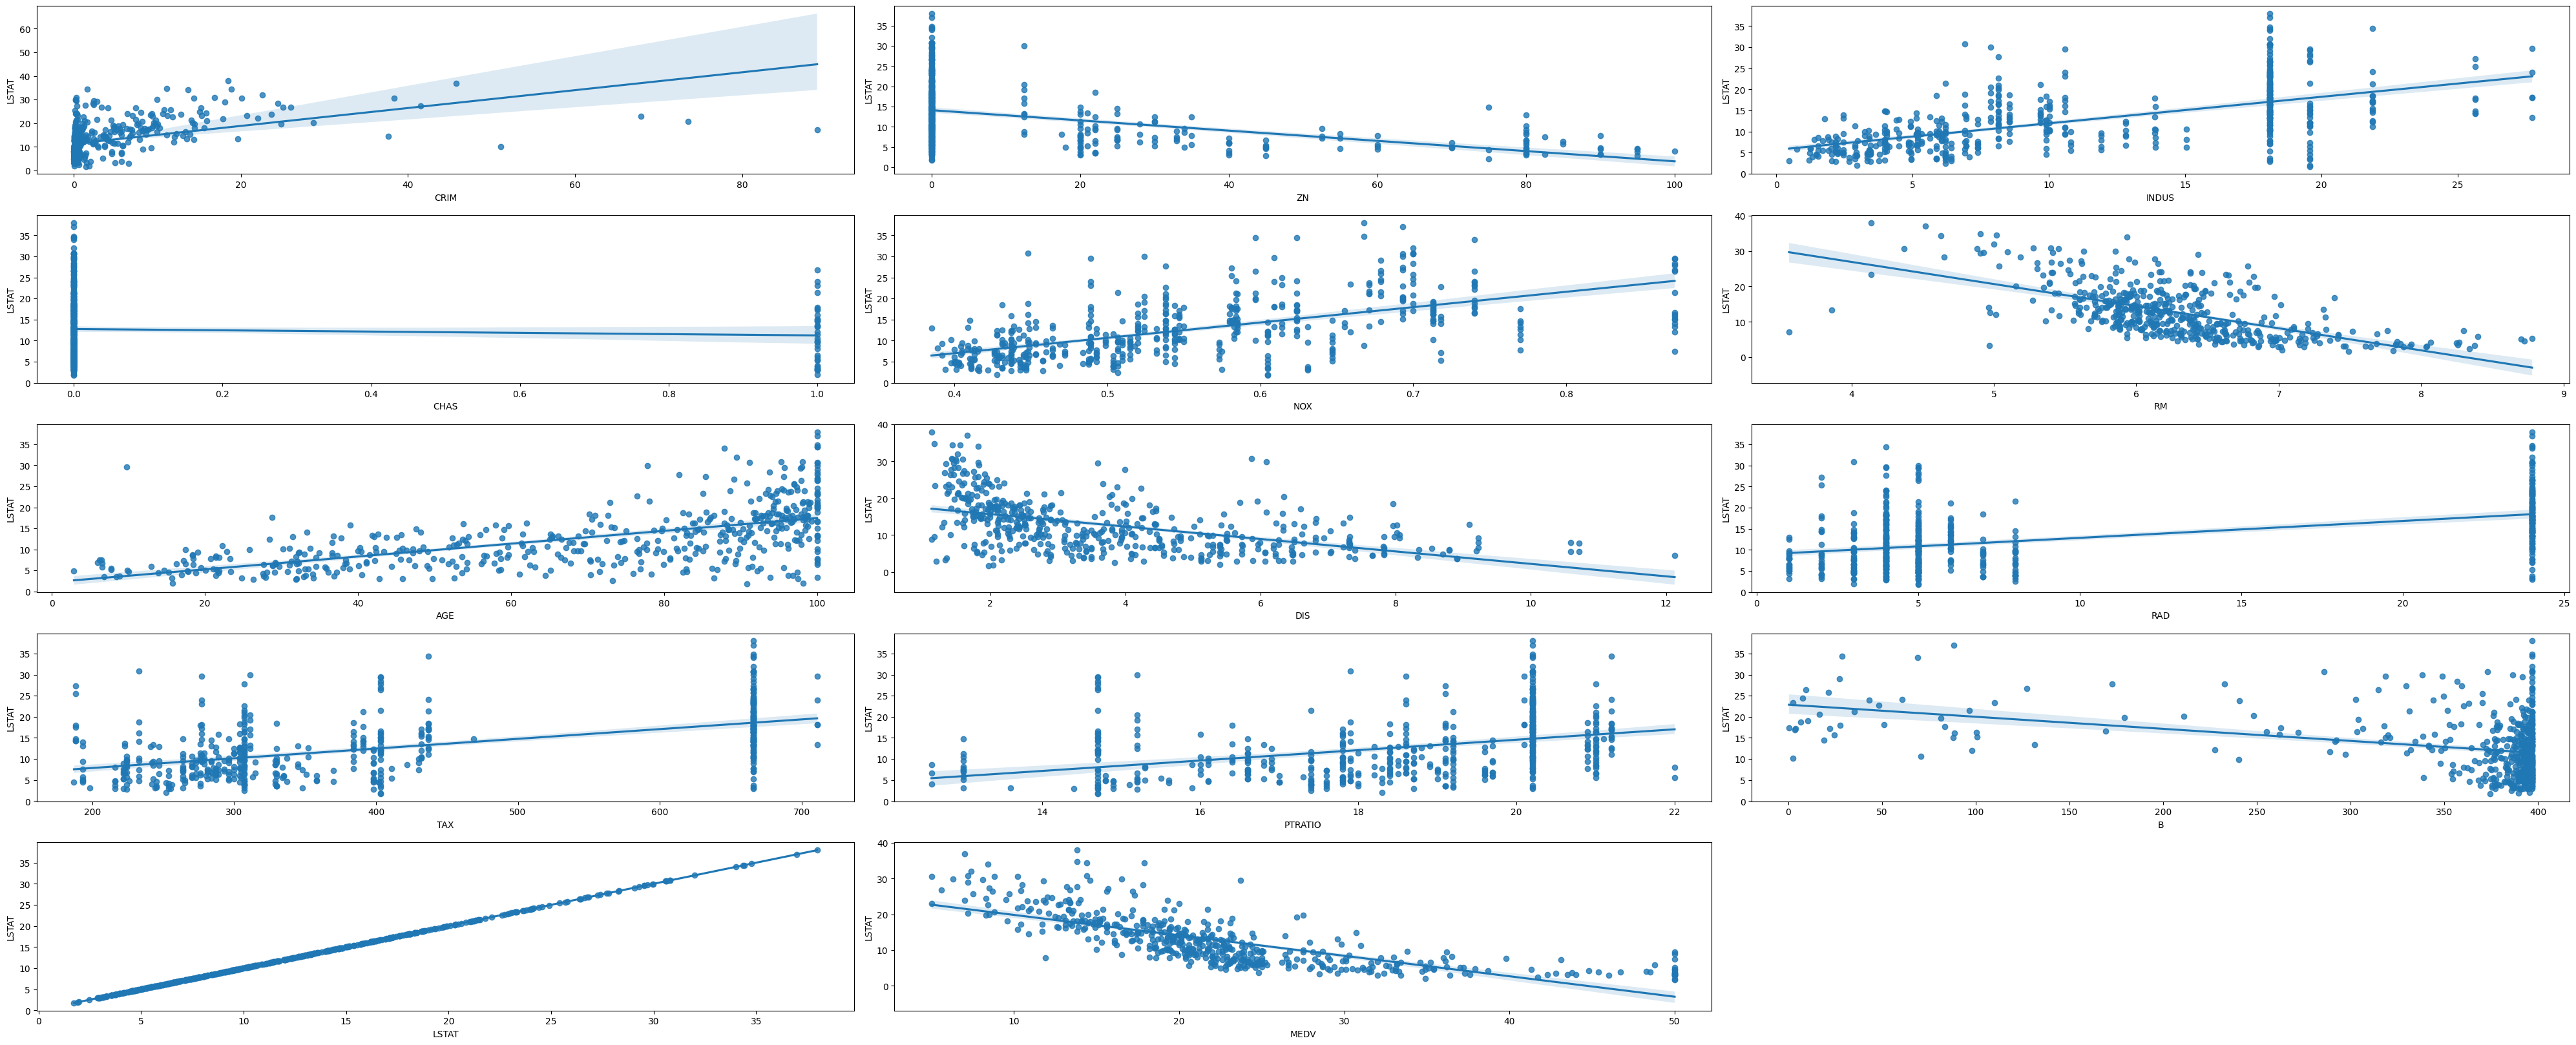

In [26]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(40,45))

for col in df.columns:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.regplot(y='LSTAT',x=col,data=df)
  c=c+1

plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

data_scaled = pd.DataFrame(ss.fit_transform(data),columns=data.columns,index=data.index)

In [28]:
# OLS

from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic
import statsmodels.api as sm


X = data_scaled.drop('MEDV',axis=1)
y = data_scaled['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     111.4
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          8.05e-132
Time:                        22:12:14   Log-Likelihood:                -326.57
No. Observations:                 466   AIC:                             681.1
Df Residuals:                     452   BIC:                             739.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.364e-16      0.023  -1.03e-14      1.0

In [29]:
#R2 = 76%, R2 ajusté = 75% bon pouvoir explicatif
#p-value INDUS and CHAS > 0.05 on ne rejette pas H0 hypothese de non signififcativité
#p-values des autres variables < 0.05 on rejette H0, les variables sont significatives

In [30]:
data_signi = data.drop(['INDUS','CHAS'],axis=1)

In [31]:
X = data_signi.drop('MEDV',axis=1)
y = data_signi['MEDV']
X = sm.add_constant(X)

y_pred = model.predict()
residuals = y - y_pred

model = sm.OLS(y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     131.0
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          3.15e-133
Time:                        22:12:14   Log-Likelihood:                -1196.5
No. Observations:                 466   AIC:                             2417.
Df Residuals:                     454   BIC:                             2467.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.6527      3.614     10.971      0.0

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


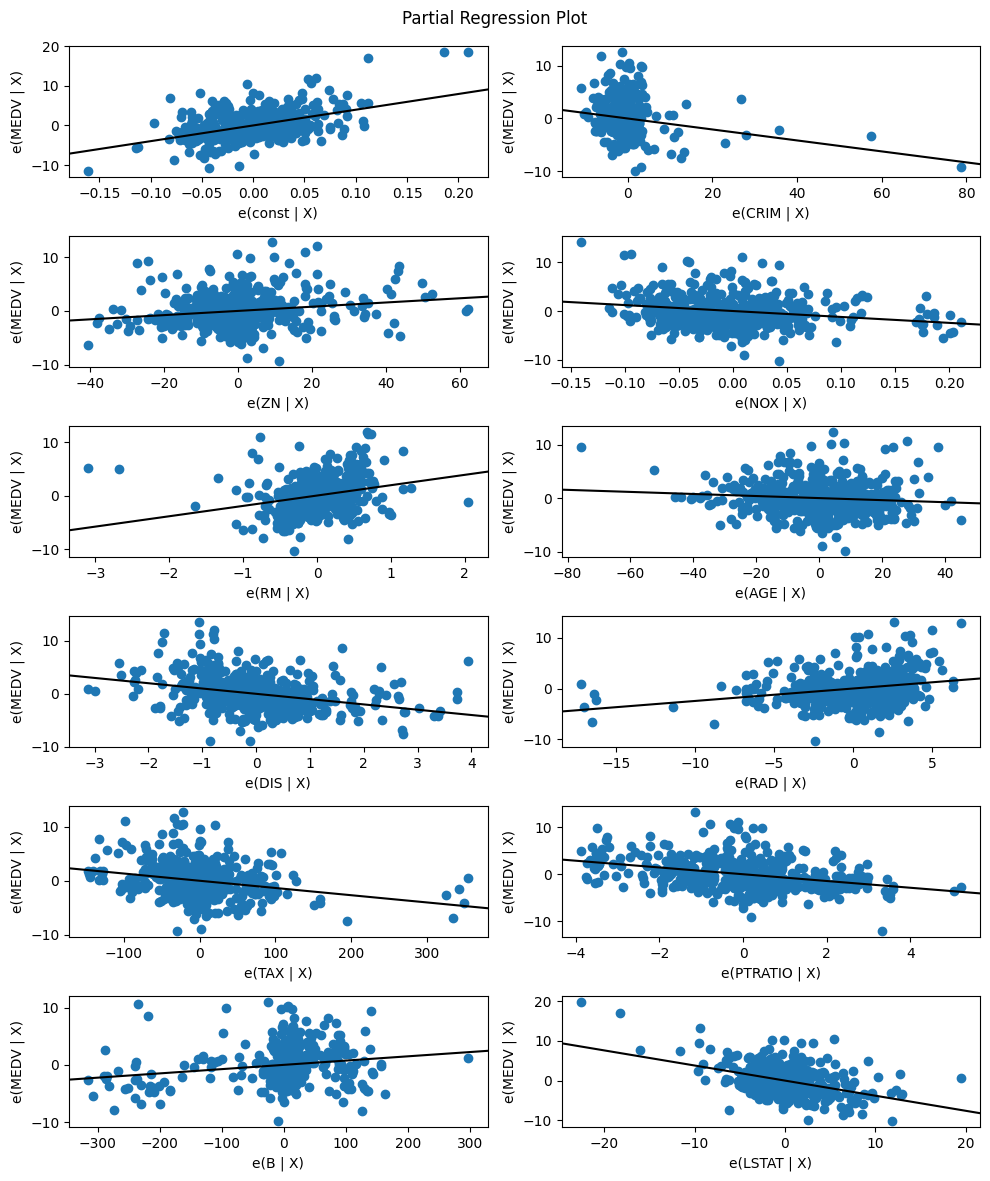

In [32]:
# Check assumptions
# linéarité

fig = plt.figure(figsize=(10,12))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [33]:
#relation linéaire entre la variable expliquée et les variables explicatives

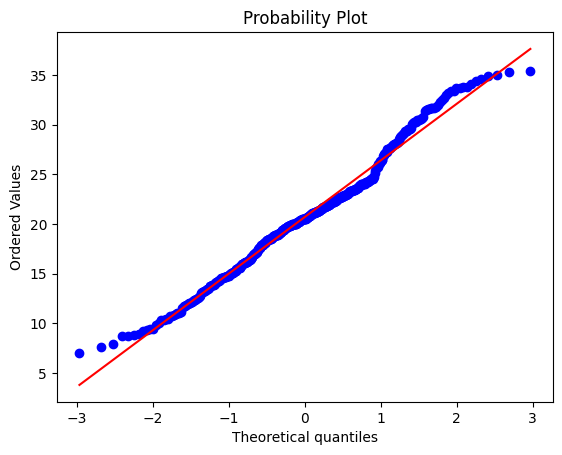

In [35]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

In [36]:
#la distribution des résidus n'est probablement pas normale

Text(0.5, 1.0, 'Normality of error terms/residuals')

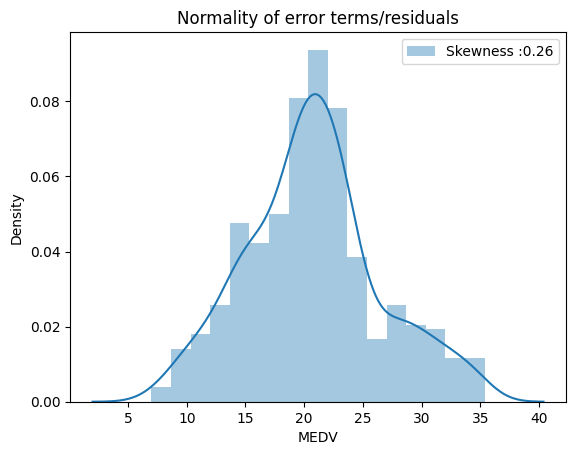

In [37]:
sns.distplot(residuals,kde=True,label='Skewness :%.2f'%(residuals.skew()))
plt.legend()
plt.title('Normality of error terms/residuals')

In [38]:
#prob(jb) < 0.5 on rejette H0 hypothese de distribution normale des résidus au seuil 5%

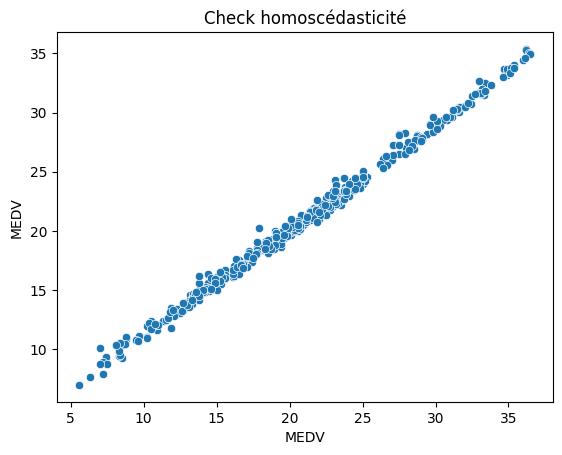

In [39]:
sns.scatterplot(x=y,y=residuals)
plt.title('Check homoscédasticité')
plt.show()

In [40]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 25.754092610519663),
 ('p-value', 0.007059223250542683),
 ('f-value', 2.41442707956889),
 ('f p-value', 0.006347114819278346)]

In [41]:
# p-value < 0,05 on rejette H0: hypothese d'homoscedasticité

Text(0, 0.5, 'Residual')

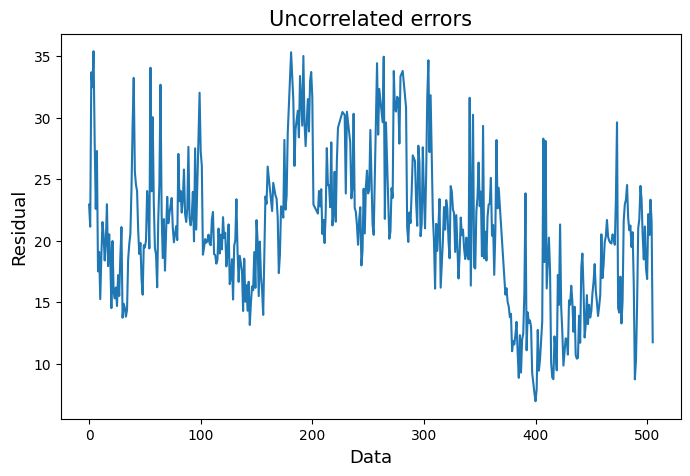

In [42]:
residuals_info = pd.DataFrame({'y_true': y, 'y_pred': y_pred, 'error': residuals}, columns=['y_true', 'y_pred', 'error'])
fig, ax = plt.subplots(figsize=(8,5))
ax = residuals_info.error.plot()
ax.set_title('Uncorrelated errors', fontsize=15)
ax.set_xlabel("Data", fontsize=13)
ax.set_ylabel("Residual", fontsize=13)

In [43]:
#0<DW<2 autocorrelation positive des erreurs

In [44]:
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic
import statsmodels.api as sm

def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [45]:
vif_cal(input_data=data, dependent_col='MEDV')

Var    Vif
5        RM  99.06
10  PTRATIO  95.01
4       NOX  73.23
9       TAX  60.63
6       AGE  21.58
11        B  18.90
7       DIS  15.60
8       RAD  15.03
2     INDUS  14.84
12    LSTAT  12.21
1        ZN   2.89
0      CRIM   2.19
3      CHAS   1.14

In [46]:
#Vif tres supérieur à 5 pour toutes ls variables sauf ZN - CRIM - CHAS, on conclut à la présence de multicolinéarité dans le modèle

In [47]:
data_signi['MEDV'] = np.log1p(data_signi['MEDV'])

In [48]:
X = data_signi.drop('MEDV',axis=1)
y = data_signi['MEDV']
X = sm.add_constant(X)

y_pred = model.predict()
residuals = y - y_pred

model = sm.OLS(y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     135.6
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          8.81e-136
Time:                        22:12:20   Log-Likelihood:                 203.25
No. Observations:                 466   AIC:                            -382.5
Df Residuals:                     454   BIC:                            -332.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1097      0.179     22.926      0.0

In [49]:
#about same R2
#p-value AGE > 0.05 on ne rejette pas H0 hypothese de non significativité à ce seuil

In [50]:
X = data_signi.drop(['MEDV','AGE'],axis=1)
y = data_signi['MEDV']
X = sm.add_constant(X)

y_pred = model.predict()
residuals = y - y_pred

model = sm.OLS(y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     149.2
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          9.51e-137
Time:                        22:12:20   Log-Likelihood:                 202.94
No. Observations:                 466   AIC:                            -383.9
Df Residuals:                     455   BIC:                            -338.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1253      0.178     23.166      0.0

In [51]:
#R2 et R2 ajusté + elevé
#p-values de outes les variables < 0.05 on rejette H0 hypothese de non significativité à ce seuil

In [52]:
np.mean(residuals)
#très proche de 0

-1.0339845336637724e-15

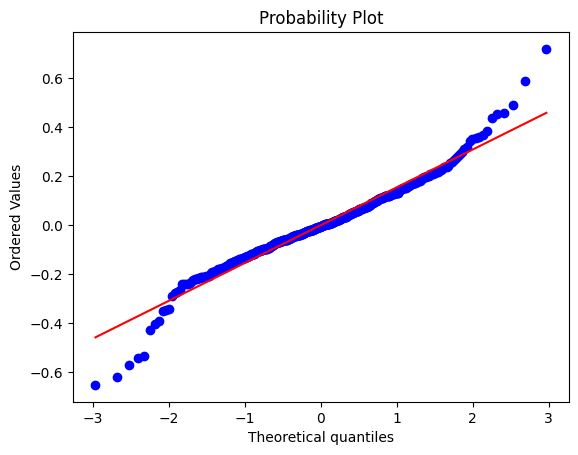

In [53]:
stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

Text(0.5, 1.0, 'Normality of error terms/residuals')

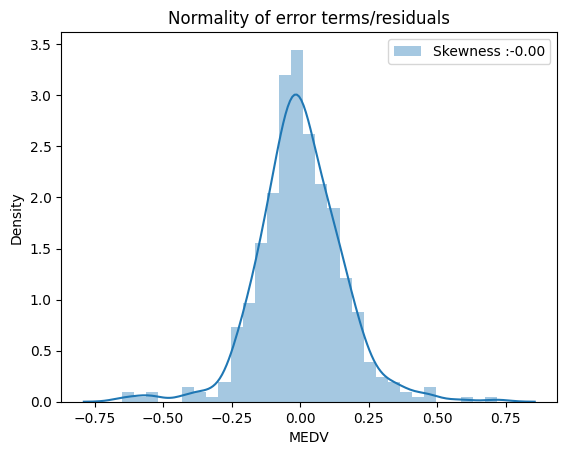

In [54]:
sns.distplot(residuals,kde=True,label='Skewness :%.2f'%(residuals.skew()))
plt.legend()
plt.title('Normality of error terms/residuals')

In [55]:
#seems distribution of residuals is normal but prob(jb)<0.05

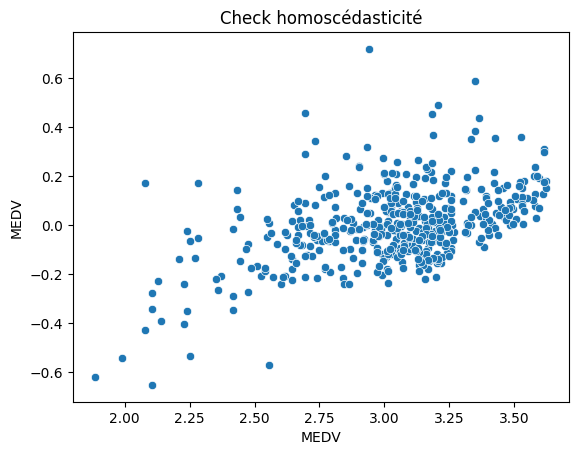

In [56]:
sns.scatterplot(x=y,y=residuals)
plt.title('Check homoscédasticité')
plt.show()

In [57]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 62.886864563747395),
 ('p-value', 1.0260299487228211e-09),
 ('f-value', 7.098137188097145),
 ('f p-value', 2.0618761131319238e-10)]

In [ ]:
# p-value < 0,05 on rejette H0: hypothese d'homoscedasticité

In [58]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 2.9059007005439126), ('p-value', 4.203250533882192e-15)]

In [ ]:
# p-value < 0,05 on rejette H0: hypothese d'homoscedasticité

Text(0, 0.5, 'Residual')

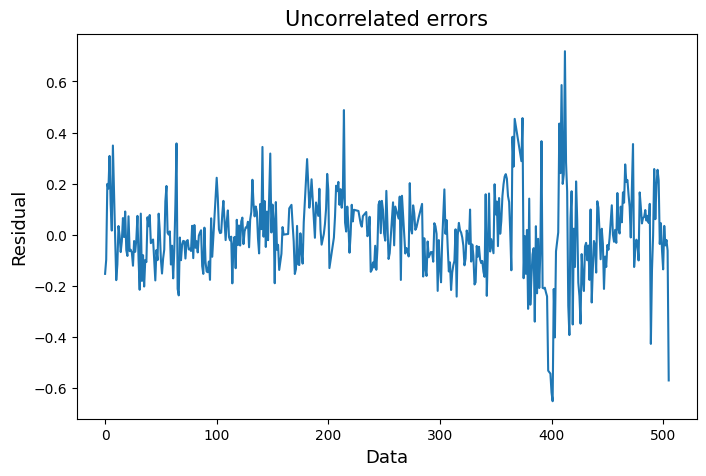

In [59]:
residuals_info = pd.DataFrame({'y_true': y, 'y_pred': y_pred, 'error': residuals}, columns=['y_true', 'y_pred', 'error'])
fig, ax = plt.subplots(figsize=(8,5))
ax = residuals_info.error.plot()
ax.set_title('Uncorrelated errors', fontsize=15)
ax.set_xlabel("Data", fontsize=13)
ax.set_ylabel("Residual", fontsize=13)

In [ ]:
#0<DW<2 autocorrelation positive des erreurs

In [60]:
vif_cal(input_data=data_signi, dependent_col='MEDV')

Var    Vif
3        RM  95.78
8   PTRATIO  92.53
2       NOX  66.32
7       TAX  49.96
4       AGE  21.56
9         B  18.82
5       DIS  14.60
6       RAD  13.98
10    LSTAT  12.11
1        ZN   2.86
0      CRIM   2.17

In [61]:
#vif greatly higher than 5 for all variables except ZN and CRIM signs of multicolinearity

In [62]:
from sklearn.model_selection import train_test_split

X = data.drop(['MEDV'],axis=1)
y = data['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [63]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [64]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error




rid = Ridge()
knn = KNeighborsRegressor()
dt  = DecisionTreeRegressor()
rf  = RandomForestRegressor()


regressors = [('Ridge Regression', rid),('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf)]

In [65]:
for regressor_name, regressor in regressors:

    regressor.fit(X_scaled, y_train)    
  
    y_pred = regressor.predict(X_test_scaled)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    '{:s} : {:.0f} %'.format(regressor_name, accuracy)
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))

Ridge Regression : 76 %
K Nearest Neighbours : 76 %
Decision Tree : 72 %
Random Forest : 84 %


In [66]:
from sklearn.model_selection import cross_val_score
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = cross_val_score(regressor, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    accuracy = accuracy.mean()
    print('{:s} : {:.3f}'.format(regressor_name, accuracy))

Ridge Regression : -2.574
K Nearest Neighbours : -3.165
Decision Tree : -2.478
Random Forest : -2.047


In [66]:
#random forest meilleur modele R2 le plus elevé et mae la plus petite